# Titanic 

### RMS Titanic

* The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. 
* There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

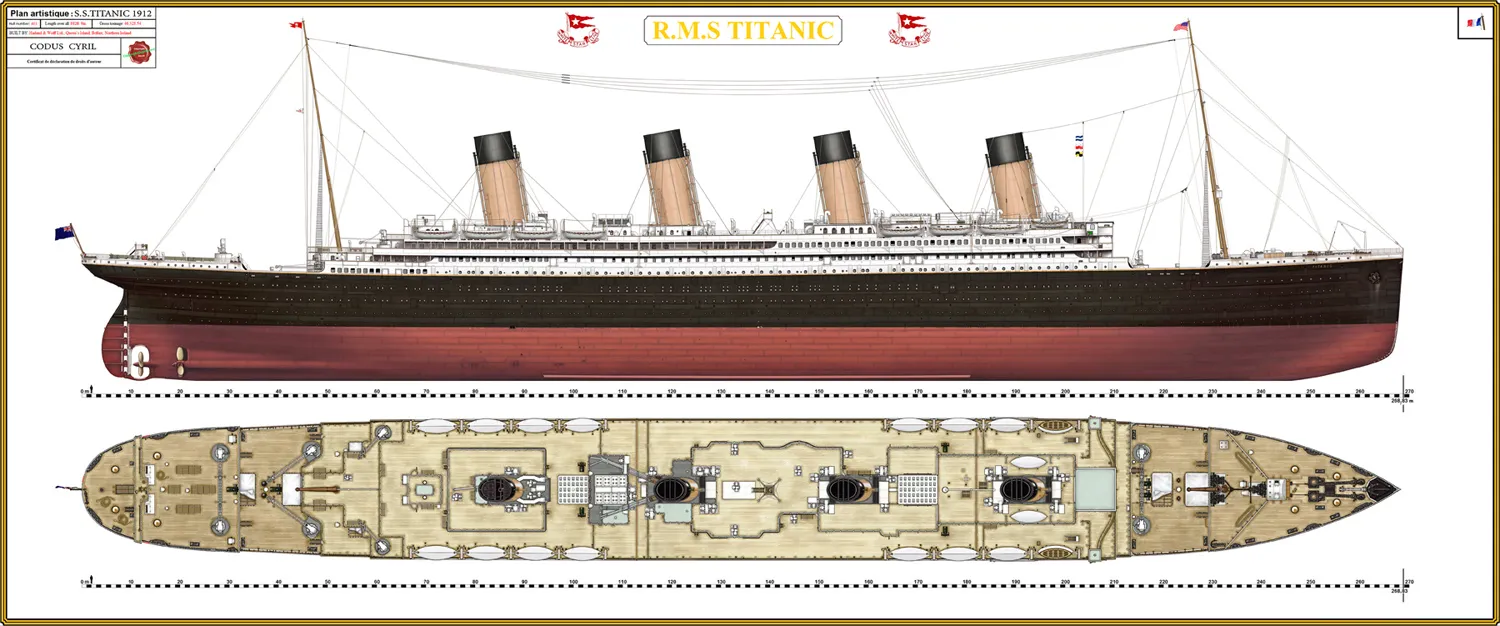

###### Aim : 

To make a system which tells whether the passengers survived in the Titanic shipwreck.

>About the dataset: 

* Survived :	Survived (1) or died (0)
* Pclass :	Passenger’s ticket class ( 1 = 1st = Upper, 2 = 2nd = Middle, 3 = 3rd = Lower) - A proxy for socio-              economic status (SES)
* Name :  Passenger’s name
* Sex :	 Passenger’s sex
* Age :	 Passenger’s age
* SibSp :	Number of siblings/spouses aboard
* Parch :	Number of parents/children aboard
* Ticket :	Ticket number
* Fare : Passenger Fare
* Cabin :	Cabin number
* Embarked  :	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Importing the Libraries

In [140]:
# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#To avoid warnings
warnings.filterwarnings('ignore')


# Tp split the data into training and testing
from sklearn.model_selection import train_test_split

# To check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Machine learning algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Getting the Data

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data Exploration/Analysis

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.shape

(891, 12)

The training set has 891 examples and 11 features
and the target variable (survived)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that :
* **38% out of the training-set survived the Titanic.** 
* We can also see that the passenger ages range from 0.4 to 80.

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Use PassengerId as Index
train_df = train_df.set_index("PassengerId")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Identification


> Identifying Predictor (Input) and Target (output) variables

In [22]:
# We have to predict whether the passenger is survived or not so our target(Output) variable will be "Survived" 
# and remaiming columns will be Predictors(Input variables)

X = train_df.loc[:,train_df.columns != "Survived"]
y = train_df.iloc[:,0]

In [23]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [26]:
# Print the Target and Input Variables

print("Input Variables:", list(X.columns))
print("Output Variable:", "['Survived']")

Input Variables: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Output Variable: ['Survived']


In [27]:
#to know the features available in the dataset

print(train_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


> Identify the data type of the variables.

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
datatype = train_df.dtypes
datatype

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [34]:
# Identify features that are categorical
cat_col = datatype[datatype == 'object'].index.tolist()
print("Categorical Columns :",cat_col)

Categorical Columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [35]:
# Identify features that are numerical
num_col = datatype[(datatype == 'float64')|(datatype == 'int64')].index.tolist()
print("Numerical Columns :",num_col)

Numerical Columns : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [36]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The distribution of numerical feature values across the samples**

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.



In [37]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**The distribution of categorical features?**

* Names are unique across the dataset (count=unique=891)
* Sex variable has two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [38]:
# Lets Analysis the Target Variable "Survived"
# Calculate the percentage of people who Survived and Not Survived
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
per_sur_nonsur = (train_df["Survived"].value_counts()/train_df.shape[0]*100).round(2)
per_sur_nonsur
# 0 > not-Survived
# 1 > Survived

0    61.62
1    38.38
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

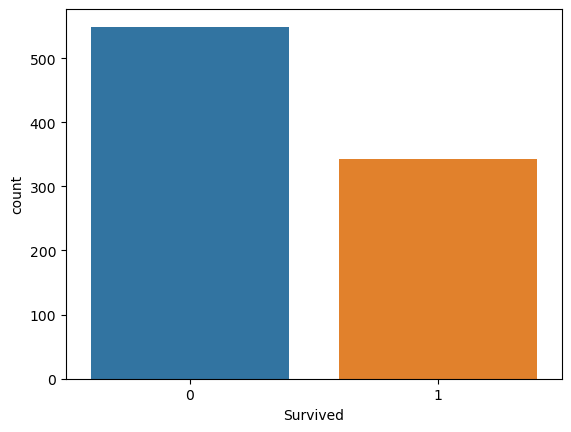

In [41]:
# Lets plot the graph who are survided and not survied as per the column data

sns.countplot(data=train_df,x="Survived")

<Axes: xlabel='Age', ylabel='Count'>

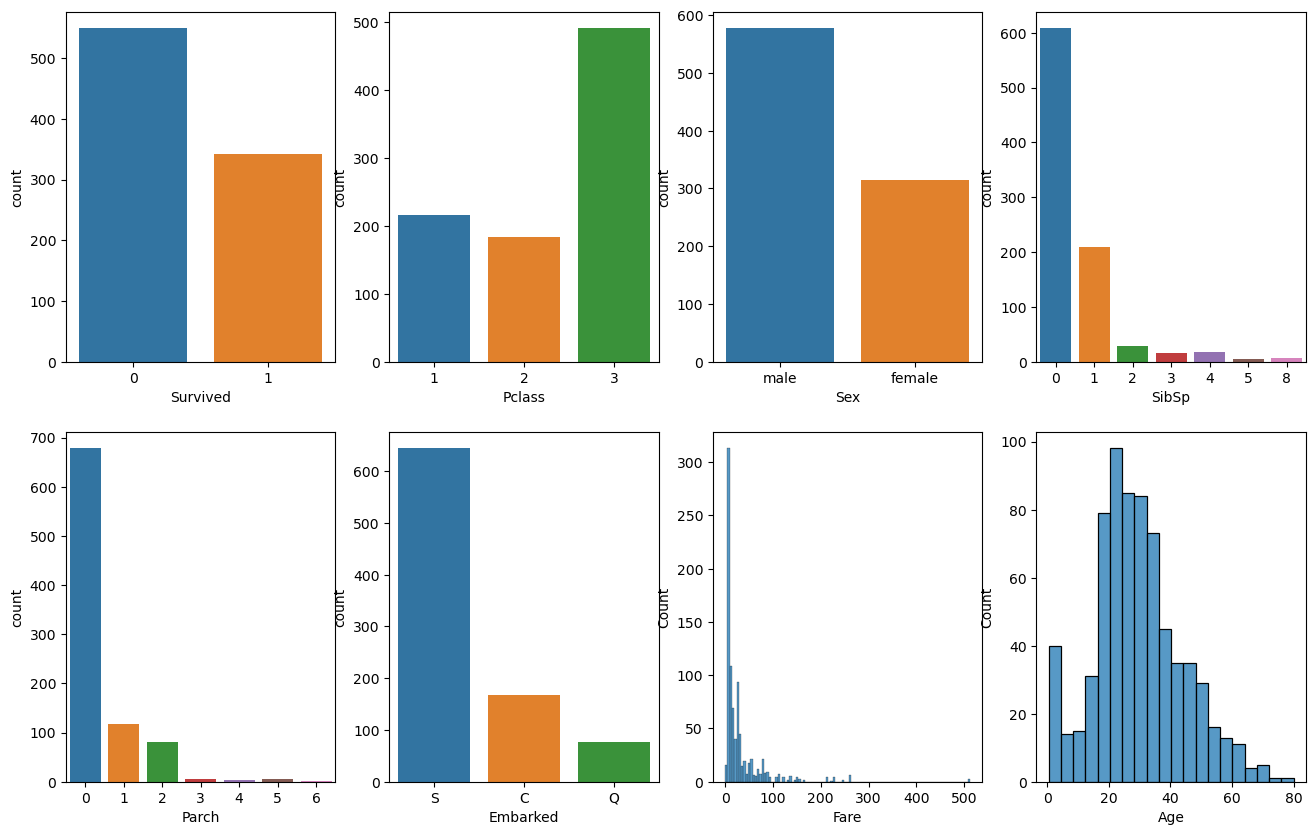

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Supress future warning
# Combined univariate analysis of each variables
fig,axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot(x='Survived',data=train_df,ax=axes[0,0])
sns.countplot(x='Pclass',data=train_df,ax=axes[0,1])
sns.countplot(x='Sex',data=train_df,ax=axes[0,2])
sns.countplot(x='SibSp',data=train_df,ax=axes[0,3])
sns.countplot(x='Parch',data=train_df,ax=axes[1,0])
sns.countplot(x='Embarked',data=train_df,ax=axes[1,1])
#sns.distplot(df_train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(data=train_df,x="Fare",ax=axes[1,2])
sns.histplot(data=train_df,x="Age",ax=axes[1,3] )

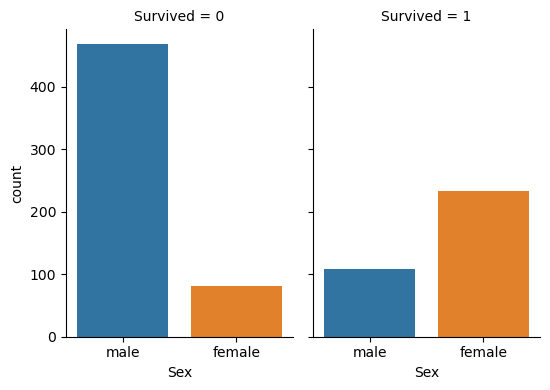

In [45]:
# Lets more elaborate survived data with sex and we will use catplot or countplot

sns.catplot(x="Sex",col="Survived",data=train_df, kind="count",height=4, aspect=.7)


We can clearly see that male survial rates is around 19% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

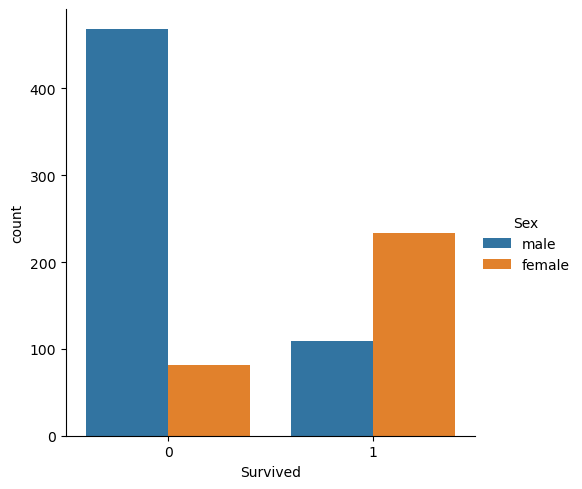

In [46]:
sns.catplot(x='Survived',hue="Sex",data=train_df,kind = "count")


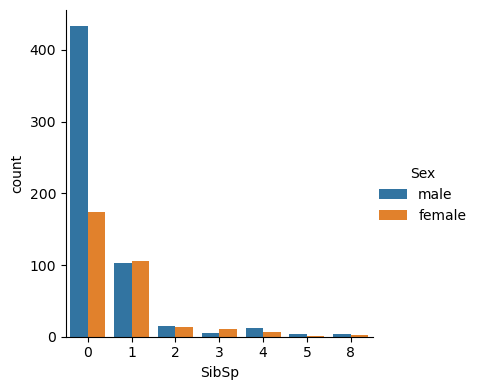

In [48]:
# Display Sibling with sex data

sns.catplot(data=train_df,x="SibSp",hue = "Sex", kind = "count",height=4,legend=True)

<Axes: title={'center': 'Age'}, xlabel='Survived'>

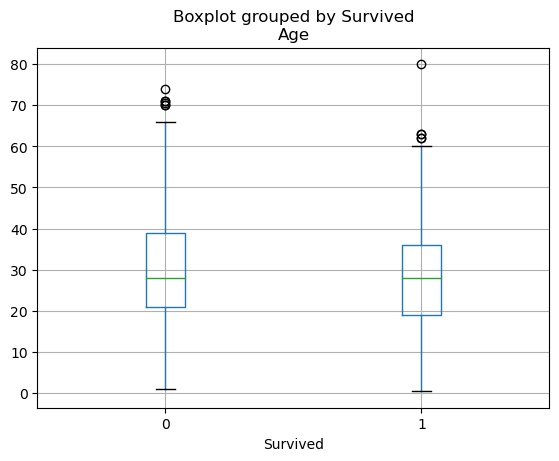

In [49]:
# Lets analyse survided corresponding to Age 
train_df.boxplot(column="Age",by="Survived")

In [50]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values
(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: >

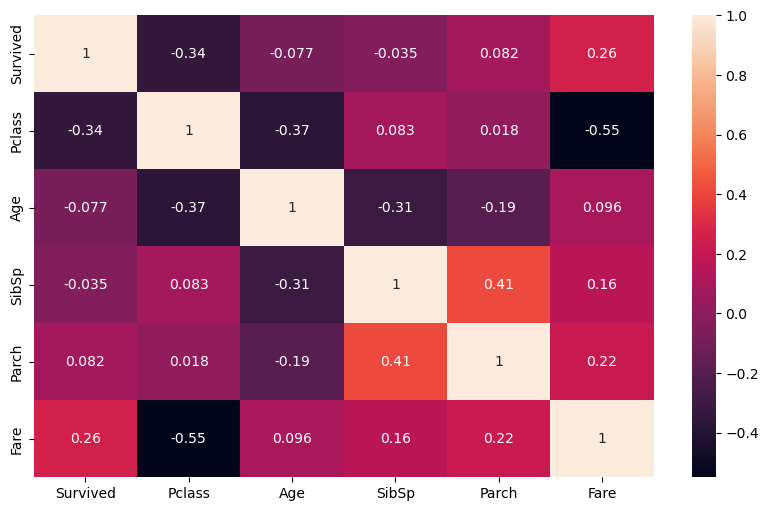

In [51]:
# Co-relation matrix

fig,ax = plt.subplots(figsize = (10,6))
corr = train_df.corr()
sns.heatmap(corr,annot=True)

From the above graph we can say that there is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived. Also there is a negative coorelation between Fare and Pclass, Age and Plcass.

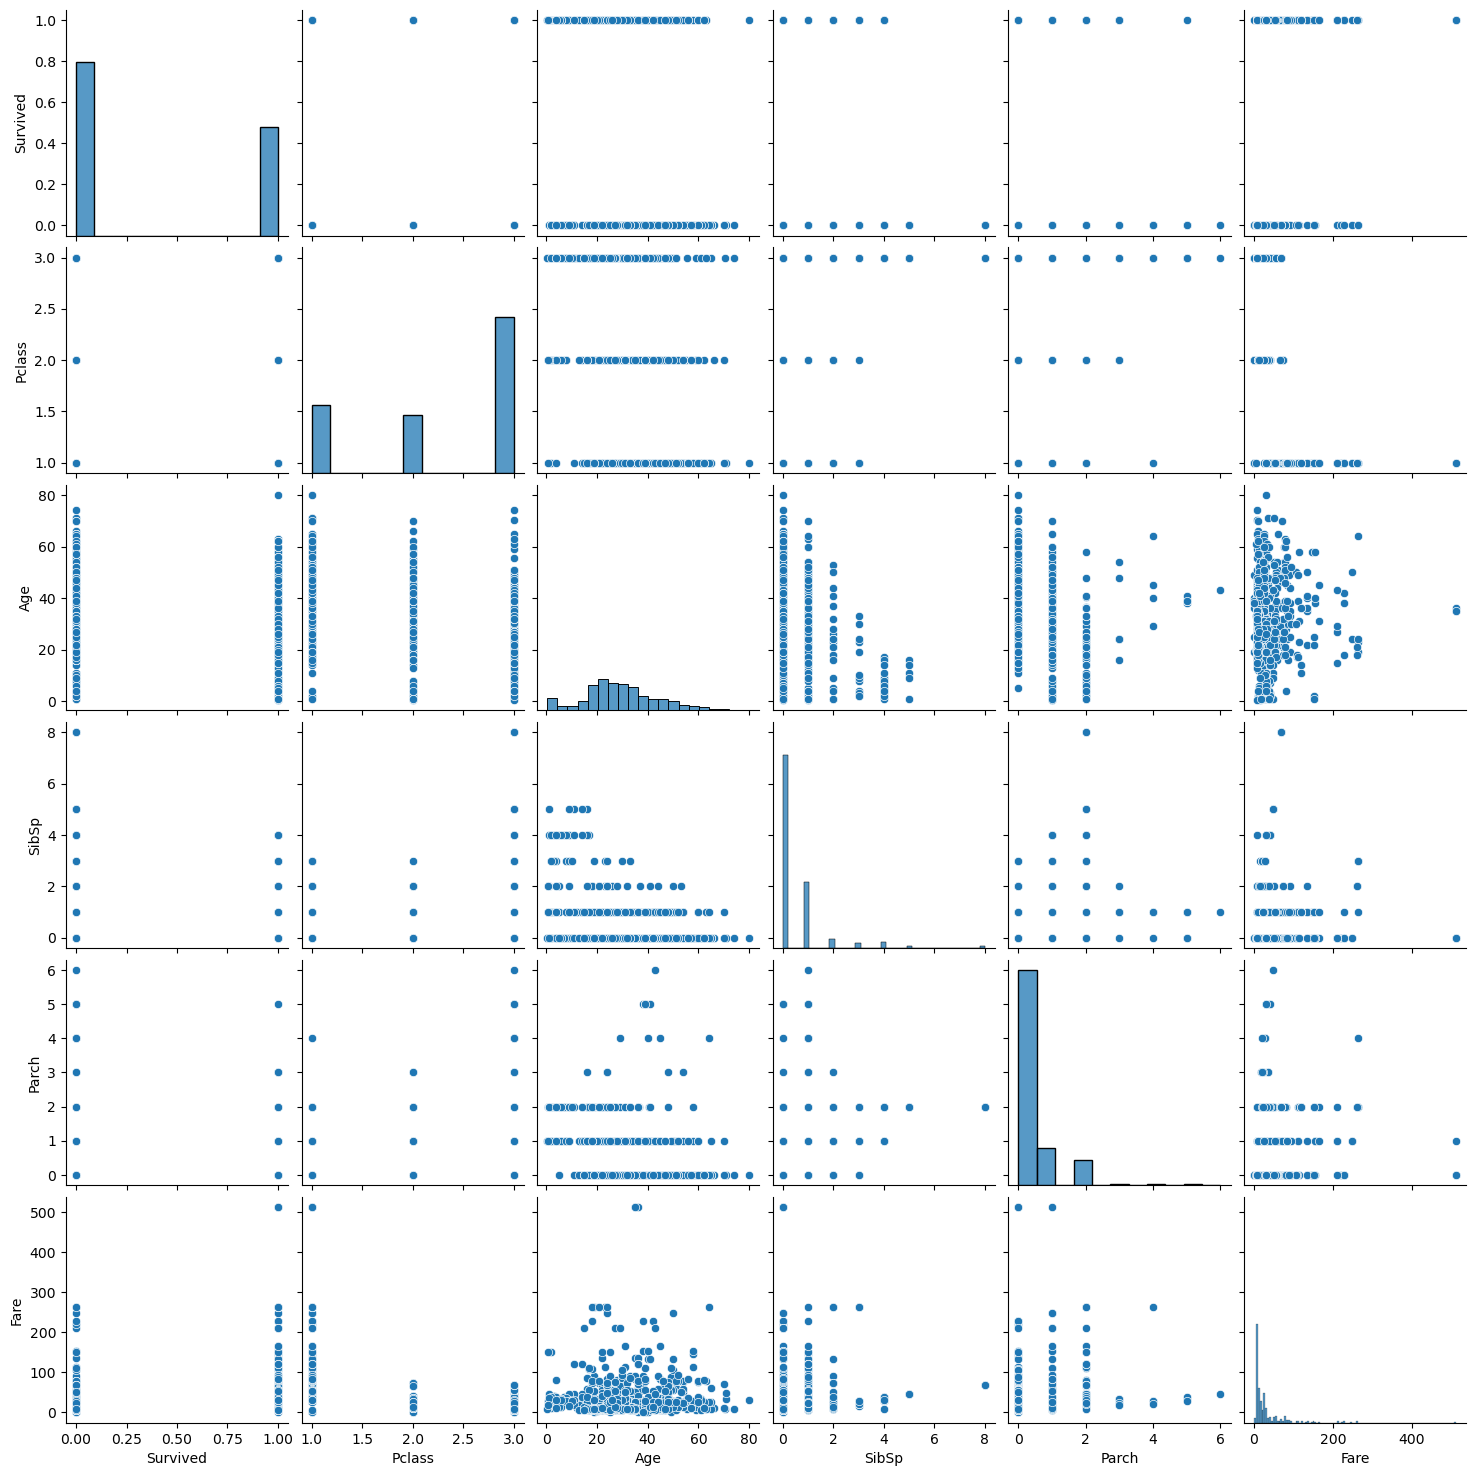

In [52]:
sns.pairplot(train_df)


### Data Cleaning

#### 1. Handling Dulicate Data

In [54]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset

train_df.duplicated().sum()

0

We can see that there are no duplicate values found in the dataset

#### 2. Handling missing value (Categorical Data and Numerical Data)



In [56]:
train_df.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [57]:
train_df.drop(columns = ['Cabin','Ticket','Name'],inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [66]:
# Filling null values

train_df['Embarked'].fillna(train_df['Embarked'].mode().values[0],inplace=True)

In [67]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

In [68]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Feature Encoding

In [77]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [78]:
# Converting categorical features into numerical before training the model
Sex_dum = pd.get_dummies(train_df['Sex'],drop_first=True)
Sex_dum

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


In [80]:
Pclass_dum = pd.get_dummies(train_df['Pclass'],drop_first=True)
Pclass_dum

,2,3
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,0
5,0,1
...,...,...
887,1,0
888,0,0
889,0,1


In [81]:
Embarked_dum = pd.get_dummies(train_df['Embarked'],drop_first=True)
Embarked_dum

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
...,...,...
887,0,1
888,0,1
889,0,1


In [101]:
new_df = pd.concat([train_df,Sex_dum,Pclass_dum,Embarked_dum],axis=1)
new_df.columns = new_df.columns.astype(str)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,2,3,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
2,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
3,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
4,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [102]:
new_df.drop(columns=['Pclass','Sex','Embarked'],inplace=True)
new_df

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
PassengerId,,,,,,,,,,
1,0,22.000000,1,0,7.2500,1,0,1,0,1
2,1,38.000000,1,0,71.2833,0,0,0,0,0
3,1,26.000000,0,0,7.9250,0,0,1,0,1
4,1,35.000000,1,0,53.1000,0,0,0,0,1
5,0,35.000000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,27.000000,0,0,13.0000,1,1,0,0,1
888,1,19.000000,0,0,30.0000,0,0,0,0,1
889,0,29.699118,1,2,23.4500,0,0,1,0,1


### Training the model

In [158]:
# Identify the input and target variables

X = new_df.loc[:,new_df.columns != "Survived"]
y = new_df.iloc[:,0]


In [159]:
X.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,1,0,1,0,1
2,38.0,1,0,71.2833,0,0,0,0,0
3,26.0,0,0,7.9250,0,0,1,0,1
4,35.0,1,0,53.1000,0,0,0,0,1
5,35.0,0,0,8.0500,1,0,1,0,1


In [160]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [161]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


### Logistic Regression

In [162]:
logistic = LogisticRegression()


In [171]:
# Applying gridsearchcv for hyperparameter tuning
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300,500,1000]}

In [172]:
classifier_regressor = GridSearchCV(logistic,param_grid=parameter,scoring='accuracy',cv=5)

In [173]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [174]:
classifier_regressor.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}

In [175]:
classifier_regressor.best_score_

0.7991726583275879

In [176]:
# Prediction
y_pred = classifier_regressor.predict(X_test)

In [177]:
# Accuracy score
score = accuracy_score(y_pred,y_test)
print(score)

0.8156424581005587


In [186]:
acc_log = round(classifier_regressor.score(X_train, y_train) * 100, 2)
acc_log

80.48

In [180]:
confusion_matrix(y_test,y_pred)

array([[95, 15],
       [18, 51]])

#### Classification report

In [179]:
class_report = classification_report(y_pred,y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       113
           1       0.74      0.77      0.76        66

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

In [185]:
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

82.87

In [183]:
# Prediction
y_pred = knn.predict(X_test)

### Decision Tree

In [187]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [188]:
y_pred = decision_tree.predict(X_test)


In [189]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.17

### Random Forest

In [191]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [192]:
y_pred = random_forest.predict(X_test)


In [193]:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.17

### Model Evaluation

We can now rank our evaluation of all the models to choose the best one for our problem.

In [197]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models=models.sort_values(by='Score', ascending=False)
models.set_index('Score')

,Model
Score,
98.17,Random Forest
98.17,Decision Tree
82.87,KNN
80.48,Logistic Regression


## Conclusion

The Titanic dataset provides a glimpse into the tragic events surrounding the sinking of 
 the RMS Titanic in 1912. Analyzing this dataset reveals intriguing insights into the 
 demographics of the passengers, their ticket classes, and, most importantly, the factors that may have influenced their chances of survival.

One of the most striking observations is the distribution of survival outcomes. The 'Survived' column indicates that a significant portion of the passengers did not survive the disaster. This aligns with historical records and the well-documented challenges faced during the evacuation of the ship. The tragedy of the Titanic is reflected in the data, with a higher number of '0' values indicating those who did not survive compared to '1' values indicating survivors.

The gender distribution is notable, showcasing a nearly even split between male and female passengers. While the dataset doesn't explicitly indicate a survival advantage for a particular gender, historical accounts suggest that women and children were given priority during the evacuation. Further analysis, including survival rates based on gender, would shed light on whether this historical narrative is reflected in the dataset.

Examining the age distribution reveals a diverse range of passengers, from infants to elderly individuals. However, the dataset contains missing age values, represented by blank spaces. Imputing or handling these missing values could provide a more accurate understanding of the age demographics on board.

Ticket class information is another crucial aspect of the dataset. The majority of passengers were in 3rd class, followed by 1st and 2nd class. The distribution across classes is indicative of the social stratification of passengers aboard the Titanic. Exploring survival rates based on ticket class could reveal whether individuals in higher classes had a better chance of survival, as suggested by historical accounts.

Family dynamics are apparent through the 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) columns. Some passengers traveled with family members, while others embarked alone. Analyzing survival rates based on family size and composition could unveil patterns in the evacuation process.

The dataset also includes fare information, indicating varying ticket prices. Higher fares are associated with 1st class passengers, reflecting the luxury and amenities available to them. Understanding the correlation between fare and survival status could provide insights into the accessibility of lifeboats and evacuation resources based on ticket class.

The 'Embarked' column denotes the port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton). Analyzing survival rates based on embarkation port may uncover whether there were regional variations in preparedness, passenger demographics, or other factors influencing survival.

The Titanic dataset serves as a valuable historical record, allowing us to explore the human dimensions of this tragic event. Through careful analysis, we can uncover patterns, correlations, and potential factors influencing survival. Further investigations, including statistical modeling and hypothesis testing, would enhance our understanding of the dynamics at play during the Titanic disaster. The dataset invites researchers and historians to delve deeper into the stories of the passengers and the societal context of the early 20th century.